In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import nnls
pd.set_option('display.max_rows', None)

In [14]:
path="C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/"#proportion_pxt_neh/"
time=24
# pw=0.046

In [15]:
data=pd.read_csv(path+"__CPSM_MOUSE.csv")
# data=data[data.exp_Time==time]
data=data[data.exp_Time==time].reset_index(drop="True")

data=data[['Peptied', 'charge', 'exp_Time', 'NEH', 
       'NEH_new', 'new_RMSE', 'new_cor', 'new_rsq', 'map', 'mean', 'median',
       'sd']]
data["dif"]=abs(data.NEH - data.NEH_new)
print(data.shape)

# data=data[data.new_cor>0.9]
# print(data.shape) 

# data=data[data.new_rsq>0.9]
# print(data.shape)

# data=data[data.new_error<0.05]
# print(data.shape) 

# data=data[data["mean"]<0.016]
# print(data.shape) 

# data=data[data.new_RMSE<0.015]

print(data.shape)
data.sort_values(by="dif",ascending=False)[['Peptied', 'charge', 'exp_Time', 'NEH',  'NEH_new','dif', 'new_RMSE', 'map']]

(2, 13)
(2, 13)


,Peptied,charge,exp_Time,NEH,NEH_new,dif,new_RMSE,map
0,SLGQWLQEEK,2,24,22,24.252318,2.252318,0.016166,12.122095
1,TFEESFQK,2,24,15,15.752593,0.752593,0.004480,4.729990


In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

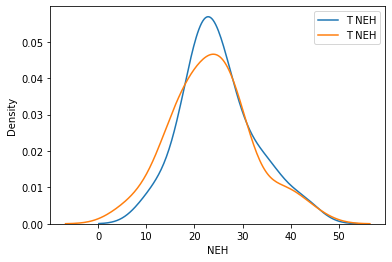

In [5]:
sns.kdeplot(data.NEH, x="NEH",label="T NEH")
sns.kdeplot(data.NEH_new, x="NEH_new",label="T NEH")
plt.legend()

(array([5., 1., 4., 2., 5., 5., 1., 2., 3., 0., 0., 0., 1., 2., 0., 0., 1.,
        2., 0., 0., 2., 0., 0., 0., 1.]),
 array([ 0.03947304,  0.44443132,  0.84938961,  1.25434789,  1.65930617,
         2.06426445,  2.46922274,  2.87418102,  3.2791393 ,  3.68409759,
         4.08905587,  4.49401415,  4.89897243,  5.30393072,  5.708889  ,
         6.11384728,  6.51880556,  6.92376385,  7.32872213,  7.73368041,
         8.13863869,  8.54359698,  8.94855526,  9.35351354,  9.75847183,
        10.16343011]),
 <BarContainer object of 25 artists>)

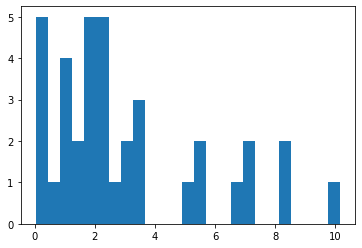

In [6]:
plt.hist(data.dif,bins=25)